<a href="https://colab.research.google.com/github/rahulsust/Algorithms-Explanation/blob/master/projects/magic_gamma_telescope_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Concepts:

ML: It is a subdomain of computer science that focuses on algorithms which helps a computers learn form data without explicit pregramming.

AI: It is an area of computer science , where the goal is to enable computers and MACHINEs to perform human-like tasks and simuLATE human behavior.

DS: A field that attempts to find patterns and draw insights from data(might use ML!)

All fields overlap! All might use ML!

SUpervised LEarning: Uses labeled inputs(meaning the input has a corrsponding output label) to train models and learn outputs.

Unsupervised learning: uses unlabeled data to learn about patterns in dada. (they can separate out things with common cues)

Reinforcement learning: agent learning in interactive environment based on rewards and penalties.

## Classification of features:

Qualitative
:
categorical data(finite number of categories or groups)
  
These are Nominal data(no-inherent order)

   our computer recognize(differentiate) them using one hot encoding.

   Here we use a binary string of length equal to number of categories.
   each position refers to only one category. For one category only one postion  in string has 1(hot) all the reaminings are 0.


Ordinal Data: 

Quantitative : NUmerical valued data (could be discrete or continuous)


### Types of prediction
#### Supervised Learning:->
(Classifications):

 Binary classifications:
 Positive/negative, cat/dog, spam/not spam.
 
 Multiclass classifications:
 cat/dog/rabbit etc,orange/apple/pear, plant species.

##### Regression:
predict continuous values. E.g. prices.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df["class"].unique()

array(['g', 'h'], dtype=object)

# As computer are not so good at understanding things that we humans understannds(names). We will convert it to numbers(0 for h,1 for g)

In [7]:
df["class"]=(df["class"]=='g').astype(int)

# This converts entire column into 1's and 0's.

In [8]:
df["class"].unique()

array([1, 0])

# We are done with this. 

 Now all the items in [*cols*] except for ***class*** is our feature(together called feature vector) that are feed into the model to predict label(weather the class is g for gamma or h for hadron)This is called classification. As we know the labels beforehand , this is actually supervised learning.

Now we will see the relation of all the features with the labels of class.

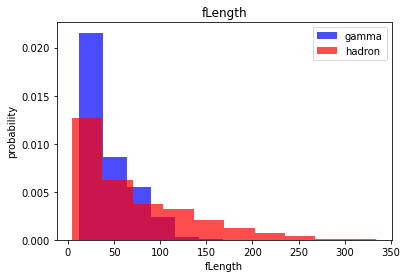

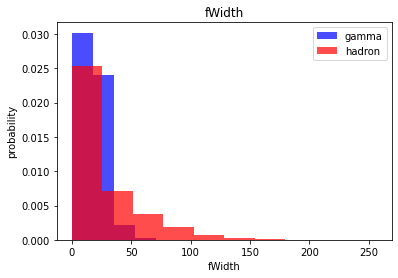

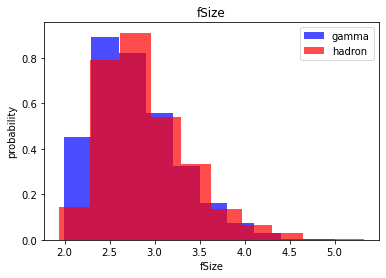

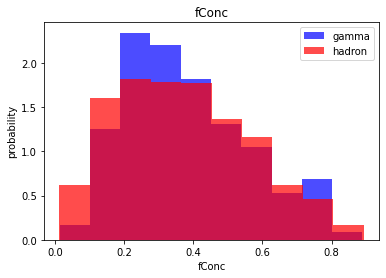

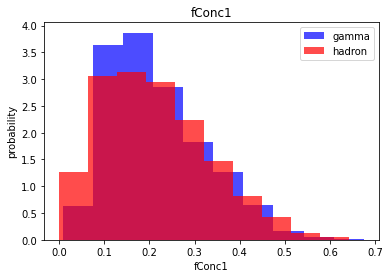

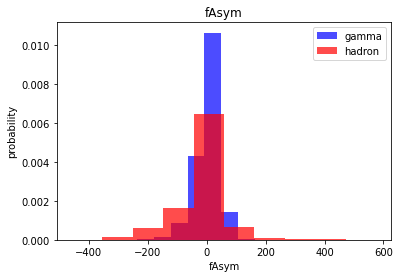

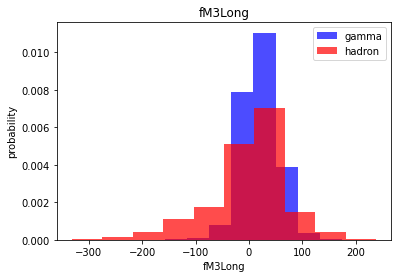

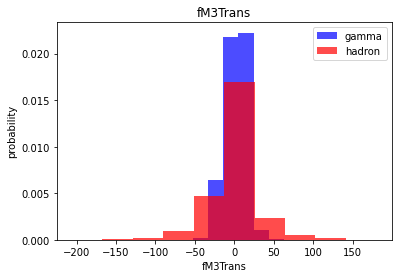

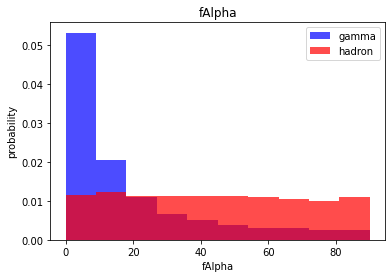

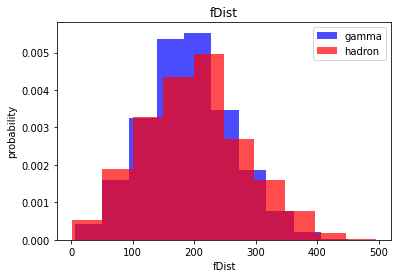

In [12]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True) #here alpha is for transparency, density is for normalizing the histgram so that we can compare two different histogram plot
  plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("probability")
  plt.legend()
  plt.show()

In [13]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)),int(.8*len(df))]) #df.sample randomize the data frame. 
#1st item in the list indicate that 60 % of data is used for training, 
#and 2nd item indicate 20 % is used for validation and
# remaining 20 % is used for testing